<a href="https://colab.research.google.com/github/odu-ayo1/ML/blob/main/Copy_of_ML_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


**Step 2: Load the dataset**

In [ ]:
# Load the data
data_train = pd.read_csv('/content/drive/MyDrive/wine/wine_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/wine/wine_test.csv')


**Step 3: Explore the data**

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.18         0.28             8.5      0.047   
1            7.8              0.20         0.20             1.4      0.036   
2            5.8              0.24         0.28             1.4      0.038   
3            6.8              0.18         0.30            12.8      0.062   
4            6.7              0.31         0.42             6.4      0.057   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 52.0                 242.0  0.99520  3.22       0.53   
1                 25.0                  83.0  0.99088  3.03       0.46   
2                 40.0                  76.0  0.98711  3.10       0.29   
3                 19.0                 171.0  0.99808  3.00       0.52   
4                 25.0                 148.0  0.99550  3.16       0.45   

   alcohol   type  quality  
0     10.5  white        6  
1     11.7  white        6  

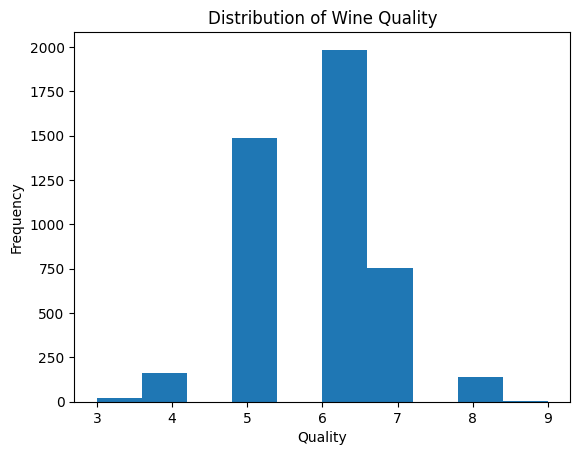

In [ ]:
# Basic data exploration
print(data_train.head())
print(data_train.info())
print(data_train.describe())

# Visualize the distribution of the target variable
plt.hist(data_train['quality'], bins=10)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()


**Step 4: Preprocess the data**

In [ ]:
# Convert 'type' to numeric (0 for red, 1 for white)
data_train['type'] = data_train['type'].map({'red': 0, 'white': 1})
data_test['type'] = data_test['type'].map({'red': 0, 'white': 1})

# Check for missing values
print(data_train.isnull().sum())
print(data_test.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64


**Step 5: Split the data into features and target variables**

In [ ]:
# Features and target variable
X_train = data_train.drop('quality', axis=1)
y_train = data_train['quality']
X_test = data_test.drop('quality', axis=1)
y_test = data_test['quality']


# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 6: Train a machine learning model**

In [ ]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


LinearRegression()

# Cross-Validation for Linear Regression

In [ ]:
cv_scores_linear = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_linear = -cv_scores_linear.mean()
print(f'Linear Regression Cross-Validation Mean Squared Error: {cv_mse_linear}')

Linear Regression Cross-Validation Mean Squared Error: 0.5535175906401935


# Hyperparameter tuning for Ridge Regression using GridSearchCV

In [ ]:
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

# Best Ridge model

In [ ]:
best_ridge_model = grid_search.best_estimator_
print(f'Best Ridge Alpha: {grid_search.best_params_["alpha"]}')

Best Ridge Alpha: 10.0



# Cross-Validation for Ridge Regression

In [ ]:
cv_scores_ridge = cross_val_score(best_ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ridge = -cv_scores_ridge.mean()
print(f'Ridge Regression Cross-Validation Mean Squared Error: {cv_mse_ridge}')

Ridge Regression Cross-Validation Mean Squared Error: 0.5532405528119122


**Step 7: Evaluate the model**

In [ ]:
# Predict and evaluate Linear Regression model
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Test Mean Squared Error: {mse_linear}')

# Predict and evaluate Ridge Regression model
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Test Mean Squared Error: {mse_ridge}')


Linear Regression Test Mean Squared Error: 0.510219541660556
Ridge Regression Test Mean Squared Error: 0.5103773125281201


# Plotting Predicted vs Actual Quality

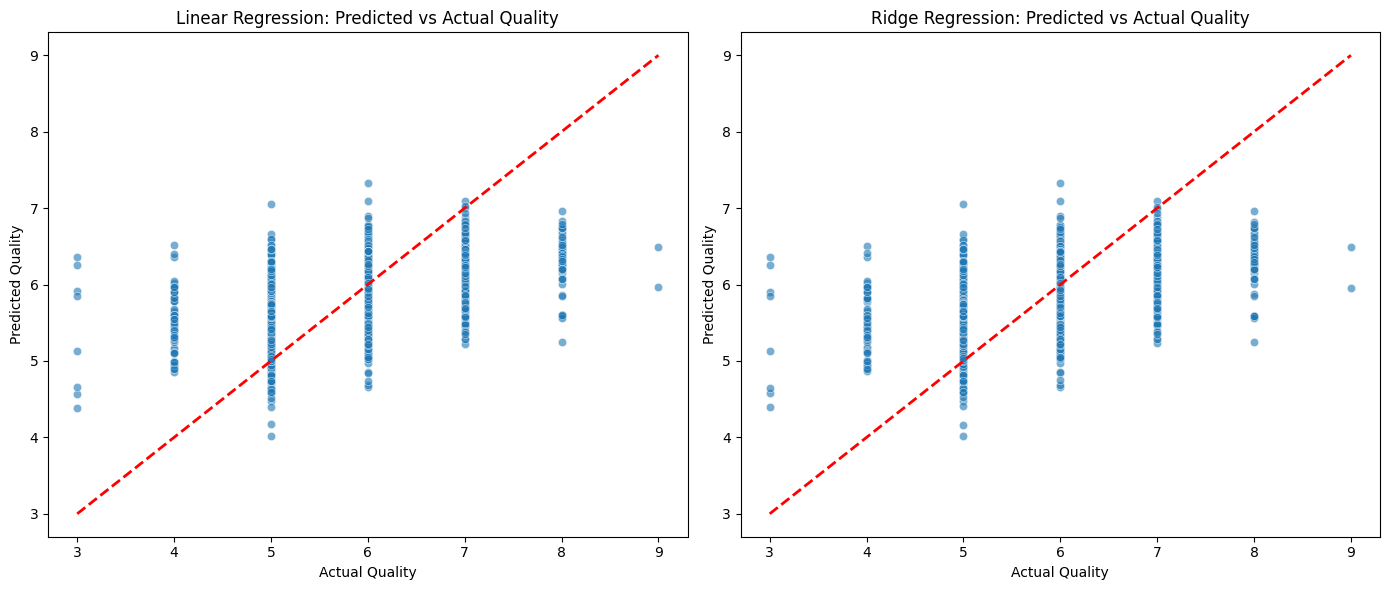

In [ ]:
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression: Predicted vs Actual Quality')

# Ridge Regression Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Ridge Regression: Predicted vs Actual Quality')

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Assuming `best_ridge_model` is your trained Ridge Regression model
joblib.dump(best_ridge_model, 'ridge_model.pkl')

['ridge_model.pkl']